In [2]:
# load catalogs
import pickle
def save_obj(name, obj):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, protocol=3)
        
def load_obj(name):
        try:
            with open(name + '.pkl', 'rb') as f:
                return pickle.load(f)#, encoding='latin1')
        except:
            with open(name + '.pkl', 'rb') as f:
                return pickle.load(f, encoding='latin1')


import numpy as np
import pyfits as pf
#save_obj('/global/cfs/cdirs/des/mgatti/BFD_CAT_V1',catalog)
m = pf.open('/global/cfs/cdirs/des/schutt20/catalogs/y6a2_piff_v3_allres_v3_collated.fits')
ras = m[1].data['RA']
decs = m[1].data['DEC']
r_mag = m[1].data['R_MAG']


import treecorr

Nbins = 20

min_theta = 2.5/60.
max_theta = 250./60.
number_of_cores = 64
bin_slope = 0.01


conf = {'nbins': Nbins,
            'min_sep': min_theta,
            'max_sep': max_theta,
            'sep_units': 'degrees',
            'bin_slop': bin_slope,
            'nodes': number_of_cores  # parameter for treecorr
            }

# laod BFD catalog ----
catalog = load_obj('/global/cfs/cdirs/des/mgatti/BFD_CAT_V1')
cat_data = treecorr.Catalog(ra=catalog['ra'], dec=catalog['dec'], g1=catalog['e1']-np.mean(catalog['e1']), g2=catalog['e2']-np.mean(catalog['e2']),ra_units='deg', dec_units='deg',npatch=100)

# load lenses ----
mask = r_mag>16.5
cat_a = treecorr.Catalog(ra=ras[mask], dec=decs[mask],ra_units='deg', dec_units='deg',npatch=100)
ng = treecorr.NGCorrelation(conf,var_method='jackknife')
ng.process(cat_a,cat_data)





gammat,gammat_im,gammaterr=ng.calculateXi() 
covj = ng.estimate_cov('jackknife')
save_obj('stars_faint',[gammat,gammat_im,gammaterr,covj,ng])



# load lenses ----
mask = r_mag<16.5
cat_a = treecorr.Catalog(ra=ras[mask], dec=decs[mask],ra_units='deg', dec_units='deg',npatch=100)
ng = treecorr.NGCorrelation(conf,var_method='jackknife')
ng.process(cat_a,cat_data)





gammat,gammat_im,gammaterr=ng.calculateXi() 
covj = ng.estimate_cov('jackknife')
save_obj('stars_bright',[gammat,gammat_im,gammaterr,covj,ng])



/global/homes/m/mgatti/.conda/envs/bfd_env3/lib/python3.6/site-packages/pyfits/__init__.py:22: PyFITSDeprecationWarning: PyFITS is deprecated, please use astropy.io.fits
  PyFITSDeprecationWarning)  # noqa


In [7]:
from matplotlib.colors import LinearSegmentedColormap

def load_obj(name):
        try:
            with open(name + '.pkl', 'rb') as f:
                return pickle.load(f)#, encoding='latin1')
        except:
            with open(name + '.pkl', 'rb') as f:
                return pickle.load(f, encoding='latin1')

def hex_to_rgb(value):
    value = value.lstrip('#')
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))


def rgb_to_hex(rgb):
    return '#%02x%02x%02x' % rgb
   
#des scheme
colors = ['#601A4A', '#EE442F','#63ACBE']


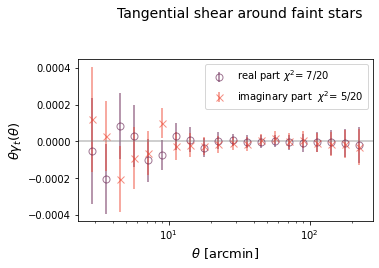

7.052246297757319 0.9965101708763672 -2.697813254354134


In [21]:
import matplotlib.pyplot as plt
gammat,gammat_im,gammaterr,covj,ng = load_obj('stars_faint')
th  = ng.meanr*60

fig, ax = plt.subplots(1,1,sharex = True, figsize=(5,3.5))



#ax.legend(fontsize=12)
ax.set_ylabel(r"$\theta \gamma_t (\theta)$",size=13)
ax.set_xlabel(r"$\theta$"+' [arcmin]',size=13)

plt.suptitle('Tangential shear around faint stars',fontsize=14,y=1.05,x=0.6)
ax.axhline(y=0, c='grey', alpha=0.5)


plt.xscale('log')
plt.tight_layout()
chi2= np.matmul(gammat,np.matmul(np.linalg.inv(covj),gammat)) #np.sum((gammat/np.sqrt(covj.diagonal()))**2)
chi2_im= np.sum((gammat_im/np.sqrt(covj.diagonal()))**2)
#chi2= np.sum((gammat/np.sqrt(covj.diagonal()))**2)


ax.errorbar(th,gammat,np.sqrt(covj.diagonal()),fmt='o', alpha = 0.6,label = 'real part $\chi^2$={0:2.0f}/{1}'.format(chi2,20) ,markersize=7,markerfacecoloralt=colors[0],color=colors[0],fillstyle='none')
ax.errorbar(th,gammat_im,np.sqrt(covj.diagonal()),fmt='x', alpha = 0.6,label = 'imaginary part  $\chi^2$={0:2.0f}/{1}'.format(chi2_im,20) ,markersize=7,markerfacecoloralt=colors[1],color=colors[1],fillstyle='none')

#plt.savefig('./figures/gammat_field_centers.pdf',bbox_inches='tight')
plt.legend()
plt.show()

import pickle
import scipy.stats

pval = scipy.stats.chi2.sf(chi2, df=20) 
sigmas = scipy.stats.norm.isf(pval)
print (chi2,pval,sigmas)


In [22]:
0

0

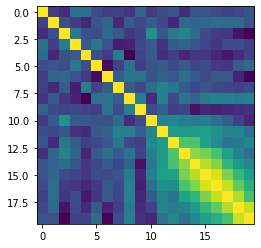

In [ ]:
corr = np.zeros_like(covj)
for i in range(20):
    for j in range(20):
        corr[i,j] = covj[i,j]/np.sqrt(covj[i,i]*covj[j,j])
plt.imshow(corr)

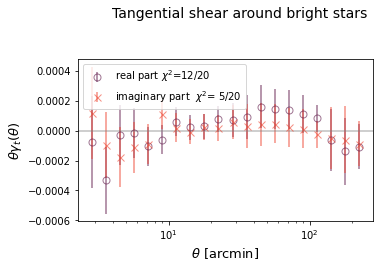

11.518045404071446 0.9316667422490489 -1.4883200283901827


In [23]:
import matplotlib.pyplot as plt
gammat,gammat_im,gammaterr,covj,ng = load_obj('stars_bright')
th  = ng.meanr*60

fig, ax = plt.subplots(1,1,sharex = True, figsize=(5,3.5))



#ax.legend(fontsize=12)
ax.set_ylabel(r"$\theta \gamma_t (\theta)$",size=13)
ax.set_xlabel(r"$\theta$"+' [arcmin]',size=13)

plt.suptitle('Tangential shear around bright stars',fontsize=14,y=1.05,x=0.6)
ax.axhline(y=0, c='grey', alpha=0.5)


plt.xscale('log')
plt.tight_layout()
chi2= np.sum((gammat/np.sqrt(covj.diagonal()))**2)
chi2_im= np.sum((gammat_im/np.sqrt(covj.diagonal()))**2)


ax.errorbar(th,gammat,np.sqrt(covj.diagonal()),fmt='o', alpha = 0.6,label = 'real part $\chi^2$={0:2.0f}/{1}'.format(chi2,20) ,markersize=7,markerfacecoloralt=colors[0],color=colors[0],fillstyle='none')
ax.errorbar(th,gammat_im,np.sqrt(covj.diagonal()),fmt='x', alpha = 0.6,label = 'imaginary part  $\chi^2$={0:2.0f}/{1}'.format(chi2_im,20) ,markersize=7,markerfacecoloralt=colors[1],color=colors[1],fillstyle='none')

#plt.savefig('./figures/gammat_field_centers.pdf',bbox_inches='tight')
plt.legend()
plt.show()

import pickle
import scipy.stats

pval = scipy.stats.chi2.sf(chi2, df=20) 
sigmas = scipy.stats.norm.isf(pval)
print (chi2,pval,sigmas)
